## Task 1

In Task 1, Multinomial Naive Bayes Classifier is used to classify positive and negative reviews based on the dataset of reviews for Ford motor vehicles. The dataset will be split into training set and test set containing 80% (1105) and 20%       (277) of the data points respectively.

#### Bag of Words:

Bag of words model represents a sentence as a set of words or sequence of words (bag) and their frequency of occurence in the sentence. Most common approach is to split the sentences into single words and their individual count in the sentence.The individual words are called unigrams. For example:

"The Ford SUV is really spacious and comfortable" will be represented as 

'The','Ford','SUV','is','really','spacious','and','comfortable'


As part of Task 1, we will implement the following steps:

1. Data preprocessing which includes removing punctuation,numbers,converting text to lowercase,tokenisation and stemming.

2. Splitting the data into training and test set.

3. Vectorising and creating a separate vocabulary for training and test set.

4. training the model using Multinomial Naive Bayes.

5. Printing the confusion matrix




In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import string
import nltk
from nltk import tokenize 
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns

### Reading the data into a dataframe

In [2]:
data=pd.read_csv('car_reviews.csv',header='infer')
data


,Sentiment,Review
0,Neg,In 1992 we bought a new Taurus and we really ...
1,Neg,The last business trip I drove to San Franci...
2,Neg,My husband and I purchased a 1990 Ford F250 a...
3,Neg,I feel I have a thorough opinion of this truc...
4,Neg,AS a mother of 3 all of whom are still in ca...
...,...,...
1377,Pos,In June we bought the Sony Limited Edition Fo...
1378,Pos,After 140 000 miles we decided to replace my...
1379,Pos,The Ford Focus is a great little record setti...
1380,Pos,I needed a new car because my hyundai excel 9...


## Data Cleanup

#### 1. rem_punctuation(row):

removes the punctuation and numbers using translate. The text is converted to lowercase.  Each review is stored in the "punctuation removed" column of the dataframe.



#### 2. token(row):

splits the output of rem_punctuation into list of words using nltk tokenize.word_tokenize. The list of words for each review is stored in the "tokenized" column of the dataframe.


#### 3. stop_words(row):

removes the stop words occuring in the tokenized review. The words in the variable del_words have been deleted/excluded from the list of stop words as they indicate negative context and are important for sentiment analysis. The variable sentiment_words contains words with length greater than 1 and not in the list of stop words. The list of sentiment words are stored in the "sentiment_words" column of the dataframe. 


#### 4. stem(row):

uses the nltk.stem.SnowballStemmer(language='english') to perform stemming and returns a string of the stemmed words. The string is stored in the "stem" column of the dataframe.




In [3]:
def rem_punctuation(row):
    table=str.maketrans('','',string.digits)
    table1=str.maketrans('','',string.punctuation)
    row=row.translate(table1).translate(table).lower()
    return row

def token(row):
    row=tokenize.word_tokenize(row)
    return row

def stop_words(row):
    tokenized_word=[]
    s_words=stopwords.words("english")
    del_words=['against','no', 'nor', 'not','don', "don't",'should', "should've",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    for i in del_words:
        s_words.remove(i)
    sentiment_words=[]
    sentiment_words=[w for w in row if w not in s_words and len(w)>1 and w not in sentiment_words]
    return sentiment_words


def stem(words):
    stemmer = nltk.stem.SnowballStemmer(language='english')
    word_list=[]
    
    for w in words:
        word_list.append(stemmer.stem(w))
    review=' '.join(word_list)
    return review

In [4]:
data['punctuation removed']=data['Review'].apply(rem_punctuation)


In [5]:
data['tokenized']=data['punctuation removed'].apply(token)


In [6]:
data['sentiment_words']=data['tokenized'].apply(stop_words)


In [7]:
data['stem']=data['sentiment_words'].apply(stem)

data


,Sentiment,Review,punctuation removed,tokenized,sentiment_words,stem
0,Neg,In 1992 we bought a new Taurus and we really ...,in we bought a new taurus and we really love...,"[in, we, bought, a, new, taurus, and, we, real...","[bought, new, taurus, really, loved, decided, ...",bought new taurus realli love decid tri new ta...
1,Neg,The last business trip I drove to San Franci...,the last business trip i drove to san franci...,"[the, last, business, trip, i, drove, to, san,...","[last, business, trip, drove, san, francisco, ...",last busi trip drove san francisco went hertz ...
2,Neg,My husband and I purchased a 1990 Ford F250 a...,my husband and i purchased a ford f and had ...,"[my, husband, and, i, purchased, a, ford, f, a...","[husband, purchased, ford, nothing, problems, ...",husband purchas ford noth problem own vehicl a...
3,Neg,I feel I have a thorough opinion of this truc...,i feel i have a thorough opinion of this truc...,"[i, feel, i, have, a, thorough, opinion, of, t...","[feel, thorough, opinion, truck, compared, pos...",feel thorough opinion truck compar post evalu ...
4,Neg,AS a mother of 3 all of whom are still in ca...,as a mother of all of whom are still in car...,"[as, a, mother, of, all, of, whom, are, still,...","[mother, still, carseats, logical, thing, trad...",mother still carseat logic thing trade sx mini...
...,...,...,...,...,...,...
1377,Pos,In June we bought the Sony Limited Edition Fo...,in june we bought the sony limited edition fo...,"[in, june, we, bought, the, sony, limited, edi...","[june, bought, sony, limited, edition, focus, ...",june bought soni limit edit focus se dr sedan ...
1378,Pos,After 140 000 miles we decided to replace my...,after miles we decided to replace my wife ...,"[after, miles, we, decided, to, replace, my, w...","[miles, decided, replace, wife, toyota, camry,...",mile decid replac wife toyota camri found new ...
1379,Pos,The Ford Focus is a great little record setti...,the ford focus is a great little record setti...,"[the, ford, focus, is, a, great, little, recor...","[ford, focus, great, little, record, setting, ...",ford focus great littl record set car first ca...
1380,Pos,I needed a new car because my hyundai excel 9...,i needed a new car because my hyundai excel ...,"[i, needed, a, new, car, because, my, hyundai,...","[needed, new, car, hyundai, excel, decided, sh...",need new car hyundai excel decid shop around n...


###  Criteria 1A

#### Reviews in lowercase after punctuation and stopwords removal

The below code prints the review before and after preprocessing--punctuation,stopwords and in lowercase


In [8]:
for i in range(5):
    print('----------------------------------------------------------------------------------------------')
    print('Original Review')
    print()
    #prints the Review Column of the dataframe data containing original review
    print(data.loc[i,'Review'])
    print()
    print('Review in lowercase after punctuation and stopwords removal')
    print()
    #prints the stem column of the dataframe data containing review after 
#     preprocessing--punctuation,stopwords and in lowercase
    print(data.loc[i,'stem'])
    print('----------------------------------------------------------------------------------------------')
    
    print()

----------------------------------------------------------------------------------------------
Original Review

 In 1992 we bought a new Taurus and we really loved it  So in 1999 we decided to try a new Taurus  I did not care for the style of the newer version  but bought it anyway I do not like the new car half as much as i liked our other one  Thee dash is much to deep and takes up a lot of room  I do not find the seats as comfortable and the way the sides stick out further than the strip that should protect your card from denting It drives nice and has good pick up  But you can not see the hood at all from the driver seat and judging and parking is difficult  It has a very small gas tank I would not buy a Taurus if I had it to do over  I would rather have my 1992 back  I don t think the style is as nice as the the 1992  and it was a mistake to change the style  In less than a month we had a dead battery and a flat tire 

Review in lowercase after punctuation and stopwords removal

b

### Criteria 1B

#### Stemming Example

Code below prints the stemmed version of the words in the example list

In [9]:
ex_1=["wait", "waiting", "waited", "waits"]
ex_2=["trouble","troubling","troubled"]
ex_3=['car','cars',"car's","cars's"]

print(stem(ex_1))
print(stem(ex_2))
print(stem(ex_3))



wait wait wait wait
troubl troubl troubl
car car car car


### Creating input and output variables

In [10]:
#input variable
x=[d for d in data['stem']]
#output variable
y=[d for d in data['Sentiment']]

print(x[0])
print()
print(y[0])



bought new taurus realli love decid tri new taurus not care style newer version bought anyway not like new car half much like one thee dash much deep take lot room not find seat comfort way side stick strip should protect card dent drive nice good pick not see hood driver seat judg park difficult small gas tank would not buy taurus would rather back don think style nice mistak chang style less month dead batteri flat tire

Neg


### Criteria 1E

#### Train/Test split

In [11]:

# test_size=0.2 implies that the test set will have 20% of the data -- 277 data points

trainx,testx,trainy,testy = train_test_split(x,y,test_size=0.2,random_state=12)
print('training set', len(trainx),'data points',len(trainx)*100/len(x),'% of the data')
print('test set',len(testx),'data points',len(testx)*100/len(x),'% of the data')

training set 1105 data points 79.95658465991318 % of the data
test set 277 data points 20.04341534008683 % of the data


### Criteria 1C

#### Example vector for 5 training set reviews

output of the code below is a vector containing the unigrams and their frequency for each review

In [12]:
# Iterating through the first 5 stemmed reviews in the training set 

vector= CountVectorizer()
for i in range(5):   
    example=vector.fit_transform([trainx[i]]).toarray()
    df=pd.DataFrame(example,columns=vector.get_feature_names())
    display(df)

    



,activ,almost,alway,anyon,anyth,aren,assum,avid,began,believ,...,unfortun,use,vehicl,visit,wast,went,whether,wife,work,wrong
0,1,2,2,1,1,2,1,1,1,1,...,1,1,11,1,1,1,1,2,5,2


,ad,adequ,also,amaz,around,art,awesom,back,bad,bargain,...,valu,vehicl,wagon,well,wheel,wife,win,without,year,yes
0,1,1,1,1,1,2,1,1,1,1,...,1,5,2,3,1,1,1,1,1,2


,aliv,along,anti,approxim,auction,automobil,awar,bebop,believ,bet,...,troubl,tube,two,version,well,wop,work,would,year,younger
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,1


,ab,abil,acceler,accommod,accord,ad,adequ,aggrav,air,align,...,whatsoev,wheel,wind,window,without,wood,worst,would,year,yet
0,1,1,1,2,3,1,4,1,1,1,...,1,3,1,2,3,1,1,3,6,2


,abl,acceler,actual,addit,adjust,ago,air,airbag,also,attempt,...,want,week,well,wheel,whether,window,wonder,would,wrong,year
0,1,1,1,1,2,1,5,1,3,1,...,2,2,1,1,1,1,1,1,1,1


### Creating training set vocabulary vector


In [13]:
vector= CountVectorizer()

# here only the training set trainx is being vectorised.

train_x = vector.fit_transform(trainx).toarray()


display(train_x)



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Creating test set vocabulary vector

In [14]:
# here only the test set testx is being vectorised

test_x = vector.transform(testx).toarray()

display(test_x)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 6]], dtype=int64)

### Criteria 1D
The code below uses Multinomial Naive Bayes-- MultiNomialNB() from sklearn
#### Training the Classifier

1. The classifier is trained using the training set train_x and trainy:

    classifier.fit(train_x,trainy)
    

2. The classifier predicts the reviews in test set test_x:


    classifier.predict(test_x)
    

3. Accuracy of the classifier:


    accuracy_score(testy,predictedy)



In [15]:
classifier=MultinomialNB()
classifier.fit(train_x,trainy)
predictedy=classifier.predict(test_x)

print("Test accuracy",accuracy_score(testy,predictedy)*100,'%')


Test accuracy 77.25631768953069 %


### Criteria 1F
#### Confusion Matrix
code below outputs the confusion matrix and the proportion of True Positives,True Negatives,False Positives,False Negatives

Test accuracy 77.25631768953069 %


<AxesSubplot:>

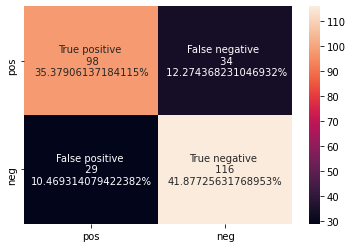

In [16]:
cm=confusion_matrix(testy, predictedy)
labels=[f'True positive \n {cm[0][0]}\n{(cm[0][0]/len(testy))*100}%',
        f'False negative \n {cm[0][1]}\n {(cm[0][1]/len(testy))*100}%',
        f'False positive \n {cm[1][0]} \n{(cm[1][0]/len(testy))*100}%',
        f'True negative \n {cm[1][1]} \n{(cm[1][1]/len(testy))*100}%']


print("Test accuracy",(testy==predictedy).sum()/len(testy)*100,'%')
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot=labels,fmt='', xticklabels=['pos','neg'], yticklabels=['pos','neg'])



## Task 2

### Criteria 2A

Below is the markdown explaining the expected outcome of the improved approach along with references.



### Improving the Classifier



In Task 1, we used unigrams to train the classifier. In task 2, we try to improve the classifier using n-grams. n-grams are 
continuous sequence of n words in a text [1].  For example,     
<br>
"The Ford SUV is comfortable"
<br>
Bigrams or when n=2    "The Ford","Ford SUV","SUV is","is comfortable"   
<br>
In Task1, we represented only the presence or absence of the positive and negative words in the review. This approach works well when the review contains purely positive or purely negative words. However, classifying reviews which contain an equal or almost equal number of positive and negative words requires an understanding of the context they are used in the sentence[2]. For instance using unigrams on the following text:   
<br>
"I'm not happy and I don’t like it!
<br>
the words "happy" and "like" will be counted as positive[2]
<br>
Therefore, pair of words like "not happy" and " don't like" show that the meaning or context of words matters along with their presence in the text. By using n-grams, more specifically bigrams we can capture pairs of consecutive words which contain polarity missed by the unigrams.
<br>
<br>
In Task 2, we will be using unigrams and bigram features to train the Multinomial Naive Bayes Classifier. Previous observations show that using only bigrams has very small improvements or even decrease performance and therefore, extending unigrams instead of completely replacing with bigrams would be a better approach[3]. The use of unigrams and bigrams showed improvement in accuracy of classification when compared to unigrams even though the increase may not be very high [3][4][5].   
<br>
Use of trigrams or higher n grams may not improve the classifier significantly. As n increases, feature vectors will contain a lot of irrelevant features or noise. For instance,
<br>
"The Ford SUV we bought is really spacious" 
<br>
"The Ford SUV","Ford SUV we","SUV we bought","we bought is","bought is really", "is really spacious"
<br>
features like "The Ford SUV", "Ford SUV we", "SUV we bought", "we bought is" contribute very less to the sentiment of the review and the frequency of their occurence in the train and test set will be very low [6].The contribution of these higher n-grams will be insignificant when compared to the contributions of unigrams.Therefore, we will ignore ngrams with n>2.
<br>
<br>
<br>


References:
<br>


[1] https://en.wikipedia.org/wiki/N-gram
<br>
[2] Silge,J., Robinson,D., 2017,  _Text Mining with R_, Sebastopol , O'Reilly Media, Inc.
<br>
[3] Bekkerman, R. and Allan, J., 2004. Using bigrams in text categorization (pp. 1-10). Technical Report IR-408, Center of     Intelligent Information Retrieval, UMass Amherst.
<br>
[4] Tan, C.M., Wang, Y.F. and Lee, C.D., 2002. The use of bigrams to enhance text categorization. Information processing &     management, 38(4), pp.529-546.
<br>
[5] Wang, S.I. and Manning, C.D., 2012, July. Baselines and bigrams: Simple, good sentiment and topic classification. In       Proceedings of the 50th Annual Meeting of the Association for Computational Linguistics (Volume 2: Short Papers) (pp.       90-94).
<br>
[6] Bengfort, B., Bilbro, R., Ojeda, T.,2018,_Applied Text Analysis with Python_,Sebastopol , O'Reilly Media, Inc.

### Criteria 2B

Lists and explains the steps for implementation of the improved approach.

#### Steps to implement the unigram+bigram approach

1. We will use the stemmed data from the stem column of our dataset.
2. Split the data into train(80%) and test set(20%) using the same random state as in Task1 to compare results.
3. We use an extra parameter in the count vectorizer : ngram_range=(1,2) where 1 denotes unigrams and 2 denotes bigrams
4. We will use the modified countvectorizer to construct the train and test vocabulary vector
5. We will train the Multinomial Naive Bayes classifier using the train unigram+bigram vector.
6. We will output the confusion matrix.


### Criteria 2C

The below cells implement the approach step by step.

In [17]:
data


,Sentiment,Review,punctuation removed,tokenized,sentiment_words,stem
0,Neg,In 1992 we bought a new Taurus and we really ...,in we bought a new taurus and we really love...,"[in, we, bought, a, new, taurus, and, we, real...","[bought, new, taurus, really, loved, decided, ...",bought new taurus realli love decid tri new ta...
1,Neg,The last business trip I drove to San Franci...,the last business trip i drove to san franci...,"[the, last, business, trip, i, drove, to, san,...","[last, business, trip, drove, san, francisco, ...",last busi trip drove san francisco went hertz ...
2,Neg,My husband and I purchased a 1990 Ford F250 a...,my husband and i purchased a ford f and had ...,"[my, husband, and, i, purchased, a, ford, f, a...","[husband, purchased, ford, nothing, problems, ...",husband purchas ford noth problem own vehicl a...
3,Neg,I feel I have a thorough opinion of this truc...,i feel i have a thorough opinion of this truc...,"[i, feel, i, have, a, thorough, opinion, of, t...","[feel, thorough, opinion, truck, compared, pos...",feel thorough opinion truck compar post evalu ...
4,Neg,AS a mother of 3 all of whom are still in ca...,as a mother of all of whom are still in car...,"[as, a, mother, of, all, of, whom, are, still,...","[mother, still, carseats, logical, thing, trad...",mother still carseat logic thing trade sx mini...
...,...,...,...,...,...,...
1377,Pos,In June we bought the Sony Limited Edition Fo...,in june we bought the sony limited edition fo...,"[in, june, we, bought, the, sony, limited, edi...","[june, bought, sony, limited, edition, focus, ...",june bought soni limit edit focus se dr sedan ...
1378,Pos,After 140 000 miles we decided to replace my...,after miles we decided to replace my wife ...,"[after, miles, we, decided, to, replace, my, w...","[miles, decided, replace, wife, toyota, camry,...",mile decid replac wife toyota camri found new ...
1379,Pos,The Ford Focus is a great little record setti...,the ford focus is a great little record setti...,"[the, ford, focus, is, a, great, little, recor...","[ford, focus, great, little, record, setting, ...",ford focus great littl record set car first ca...
1380,Pos,I needed a new car because my hyundai excel 9...,i needed a new car because my hyundai excel ...,"[i, needed, a, new, car, because, my, hyundai,...","[needed, new, car, hyundai, excel, decided, sh...",need new car hyundai excel decid shop around n...


### New input and output vector

In [18]:
x_new=[d for d in data['stem']]
y_new=[d for d in data['Sentiment']]

### train and test split

In [19]:
train_x,test_x,train_y,test_y = train_test_split(x_new,y_new,test_size=0.2,random_state=12)


print('training set', len(trainx),'data points',len(train_x)*100/len(x),'% of the data')
print('test set',len(testx),'data points',len(test_x)*100/len(x),'% of the data')



training set 1105 data points 79.95658465991318 % of the data
test set 277 data points 20.04341534008683 % of the data


### Create training set vocabulary vector

In [20]:
#modified CountVectorizer to include unigrams and bigrams denoted by the parameter ngram_range=(1,2)
vector= CountVectorizer(ngram_range=(1,2))
train_x = vector.fit_transform(train_x).toarray()

display(train_x)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Creating the test set vocabulary vector

In [21]:
test_x = vector.transform(test_x).toarray()
display(test_x)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Training the classifier

In [22]:
classifier=MultinomialNB()
classifier.fit(train_x,train_y)
predicted_y=classifier.predict(test_x)
print("Test accuracy",accuracy_score(test_y,predicted_y)*100,'%')



Test accuracy 80.14440433212997 %


### Criteria 2D

The below cells contain the confusion matrix for the new approach and the comparison of confusion matrices in Task1 and Task2

#### Confusion Matrix



Test accuracy 80.14440433212997 %


<AxesSubplot:>

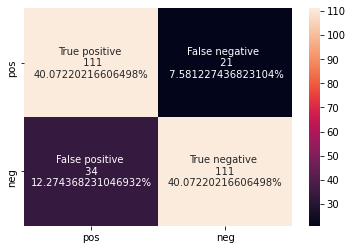

In [23]:
cm=confusion_matrix(test_y, predicted_y)
labels=[f'True positive \n {cm[0][0]}\n{(cm[0][0]/len(testy))*100}%',
        f'False negative \n {cm[0][1]}\n {(cm[0][1]/len(testy))*100}%',
        f'False positive \n {cm[1][0]} \n{(cm[1][0]/len(testy))*100}%',
        f'True negative \n {cm[1][1]} \n{(cm[1][1]/len(testy))*100}%']
print("Test accuracy",accuracy_score(test_y,predicted_y)*100,'%')

labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot=labels,fmt='', xticklabels=['pos','neg'], yticklabels=['pos','neg'])

### Task 1 and Task 2 comparison

<br>

The overall accuracy of the classifier in Task2 is 80% when compared to the Task1 where it was 77%. Therefore, the inclusion of bigrams in the features did show a minor improvement for this particular random state.The increase in the accuracy of the classifier might change depending upon the random state chosen to split the data.
<br>

Comparing the confusion matrices, we can see that in Task2, the number of True positives has increased by 5% and the number of False negatives has decreased by 4.5%. It can be seen that reviews with overall positive sentiment but with a lot of negative words, have been classified correctly as positive in Task2 which reduces the number of false negatives. For instance, reviews like "I do not mind paying a high price and do not mind the bad tyres" has more negative words but the overall sentiment is positive. Hence unigrams+bigrams, for this random state have reduced the number of false negatives.
<br>

However, the number of False positives has increased by 2%. It can be seen that the reviews with overall negative sentiment but with a lot of positive words have not been classified correctly as negative.Also,the number of True negatives have decreased by 1%. Overall, incorporating unigrams+bigrams for this state has caused more number of negative sentiments to be classified incorrectly.  